<h1 align = 'center'> Overview of the Machine Learning Lifecycle: General Aspects and a Demo </h1>
<h3 align ='center' > Mohammed Mahyoub | mmahyou1@binghamton.edu <h3/>
<h3 align ='center' > A guest lecture at the "Programming for Business Analytics" class, 11/21/2022 | Binghamton Univeristy, New York <h3/>    

# 0. Overview 
Machine learning lifecycle typically entails the following steps:
1. Scoping and business understaning 
    * What are the ojectives?
    * What is the business process and what is the role of the ML model?
    * How will the model be used within the business process? Real-time? Batch? 
2. Data
    * Define data elements 
    * Validate with Subject Matter Experts 
    * Gather data 
    * Clean, preprocess, and prepare data for modeling
    * Analyze data 
3. Model Development
    * Baseline modeling
    * Model selection 
    * Model optimization 
4. Model Testing 
    * Define evaluation metrics 
    * Evalulate performance on a testing dataset 
5. Model packaging 
5. Deployment
    * Define deployment schema:
        * Real-time inference or batch inference 
        * On the cloud or on premise
    * Deploy 
6. Monitoring and Maintenance
    * Monitor for data drift 
    * Monitor for concept drift 
    * Identify and resolve bugs 
    * Retrain model if necessary 


# 1. Scoping and business understanding 

- Objectigves:
    * Build a predictive model to estimate the income of an individual (>= 50K or < 50K).

- Business process:
    * The model is to be itegrated with a sensistive desicion-making process in a targeted marketing compaign. 
    * A group of individuals will be presented to the ML model at a time to estimate their income. Then, based on their icome they will be assigned to a compaign group (Group A or Group B).  

- Envisioning model use:
    * Model will be used by the compaign architect as stand-alone application
    * Batch inference is prefered for this application. Upload a data file containing charateristics for a collection of individuals. The model shall return the estimated income for each one. 

# 2. Data

### 2.1 Data elements definition and validation 

- Define data elements and validate with subject matter experts: For this lecture, we will assume that we have already
    * reviewed the literature and itdentify a list of features 
    * talked to subject matter experts to gain more insights 
    * validated the data elements and refined them 
    
Let us assume that the defined and refined data elements to build an income prediction model are:
   1. Age
   2. Gender
   3. Education
   4. Is Married?
   5. Occupation
   6. Hours-per-week
   7. Workclass 
   
The target vaiable is income (> 50K or <=50K).

> Note: The target variable is binary. Thus, we will be solving a classification problem. 

### 2.2 Gather data
In real scenarios, we collect data from a system, e.g., using SQL or NonSQL. For the sake of illustration we will use an income dataset downloaded from the UCI repository: https://archive.ics.uci.edu/ml/datasets/census+income.

In [1]:
# Import packages to get data  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('adult.data', header = None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
variable_names = pd.read_csv('variable_names.txt', header = None)
variable_names

,0
0,age
1,workclass
2,fnlwgt
3,education
4,education-num
5,marital-status
6,occupation
7,relationship
8,race
9,sex


In [5]:
variable_names.values.flatten()

array(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'], dtype=object)

In [6]:
dataset.columns = list(variable_names.values.flatten())
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
refined_dataset = dataset[['age', 'sex', 'education', 'marital-status', 'occupation', 'hours-per-week', 'workclass', 'income']]
refined_dataset.head()

,age,sex,education,marital-status,occupation,hours-per-week,workclass,income
0,39,Male,Bachelors,Never-married,Adm-clerical,40,State-gov,<=50K
1,50,Male,Bachelors,Married-civ-spouse,Exec-managerial,13,Self-emp-not-inc,<=50K
2,38,Male,HS-grad,Divorced,Handlers-cleaners,40,Private,<=50K
3,53,Male,11th,Married-civ-spouse,Handlers-cleaners,40,Private,<=50K
4,28,Female,Bachelors,Married-civ-spouse,Prof-specialty,40,Private,<=50K


In [9]:
# dataset size
refined_dataset.shape

(32561, 8)

### 2.3 Data cleaning and processing 

#### Null values

In [10]:
refined_dataset.isna().sum()

age               0
sex               0
education         0
marital-status    0
occupation        0
hours-per-week    0
workclass         0
income            0
dtype: int64

From the first glance, the dataset does not conatain missing values in any column. Be carefull, there may be some mising values recorded in some other manner (other than np.nan). We can discover that by printing the unique values of each column, especially categorical variable. 

In [11]:
for col in refined_dataset.columns:
    print(f'==================== {col} ==================')
    print(refined_dataset[col].unique())

==================== age ==================
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
==================== sex ==================
[' Male' ' Female']
==================== education ==================
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
==================== marital-status ==================
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
==================== occupation ==================
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 

In [12]:
def replace_null(x):
    x = x.strip()
    if x == '?':
        return np.nan
    else:
        return x

for col in ['occupation', 'workclass']:
    refined_dataset[col] = refined_dataset[col].apply(replace_null)

In [13]:
refined_dataset.dropna(axis = 0, inplace = True)
refined_dataset.reset_index(inplace = True, drop = True)

In [14]:
for col in ['occupation', 'workclass']:
    print(f'==================== {col} ==================')
    print(refined_dataset[col].unique())

==================== occupation ==================
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
==================== workclass ==================
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']


#### Describe numberical variables

In [15]:
refined_dataset.describe()

,age,hours-per-week
count,30718.000000,30718.000000
mean,38.443584,40.949313
std,13.118227,11.985382
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


In [16]:
Q1 = refined_dataset['hours-per-week'].quantile(0.25)

In [17]:
Q3 = refined_dataset['hours-per-week'].quantile(0.75)

In [18]:
iqr = Q3-Q1
iqr

5.0

In [19]:
hours_avg = refined_dataset['hours-per-week'].mean()

In [20]:
# let us get a sense of how many rows are above or equal (avg + 3 * iqr)
sum(refined_dataset['hours-per-week'] >= (hours_avg + 3 * iqr))

2657

In [21]:
# let us get a sense of how many rows are less than or equal (avg - 3 * iqr)
sum(refined_dataset['hours-per-week'] <= (hours_avg - 3 * iqr))

3307

In [22]:
refined_dataset.shape

(30718, 8)

Let us keep this in minde. We don`t want to remove the outliers from the left side. They may have a meaning in this context. Some people do not work at all (small number is expected). For the right side, let us limit the work hours to not more than 60 hours. 

In [23]:
refined_dataset =  refined_dataset[refined_dataset['hours-per-week'] <= 60]

In [24]:
refined_dataset['hours-per-week'].describe()

count    29642.000000
mean        39.737467
std         10.155192
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         60.000000
Name: hours-per-week, dtype: float64

#### Categorical variables encoding 

In [25]:
pd.options.mode.chained_assignment = None

In [26]:
# sex ==> male 1; 0 for female
def is_male(x):
    x = x.strip()
    if x == 'Male':
        return 1
    else:
        return 0

In [27]:
refined_dataset['sex'].loc[:] =  refined_dataset['sex'].apply(is_male)  # 1 for Male 0 for other
refined_dataset['sex'].unique()

array([1, 0], dtype=object)

In [28]:
# marital status ==> maried or not (1 or 0)
refined_dataset['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [29]:
def is_married(x):
    x = x.strip()
    if x in ('Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'):
        return 1
    else:
        return 0

In [30]:
refined_dataset['Is Married?'] = refined_dataset['marital-status'].apply(is_married)
refined_dataset['Is Married?'].unique()

array([0, 1], dtype=int64)

In [31]:
refined_dataset.drop('marital-status', axis = 1, inplace = True)  #remove old feature

In [32]:
# income ==> >50K and <=50K (1 and 0, respectively)
refined_dataset['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [33]:
def is_larger_than_50K(x):
    x = x.strip()
    if x == '>50K':
        return 1
    else:
        return 0

In [34]:
refined_dataset['income'] = refined_dataset['income'].apply(is_larger_than_50K)
refined_dataset['income'].unique()

array([0, 1], dtype=int64)

In [35]:
# Create dummpy variables for all other variables
refined_dataset.head()

,age,sex,education,occupation,hours-per-week,workclass,income,Is Married?
0,39,1,Bachelors,Adm-clerical,40,State-gov,0,0
1,50,1,Bachelors,Exec-managerial,13,Self-emp-not-inc,0,1
2,38,1,HS-grad,Handlers-cleaners,40,Private,0,0
3,53,1,11th,Handlers-cleaners,40,Private,0,1
4,28,0,Bachelors,Prof-specialty,40,Private,0,1


In [36]:
for col in refined_dataset.columns:
    print(f'{col} ----> {refined_dataset[col].dtype}')

age ----> int64
sex ----> object
education ----> object
occupation ----> object
hours-per-week ----> int64
workclass ----> object
income ----> int64
Is Married? ----> int64


In [37]:
refined_dataset['sex'] = refined_dataset['sex'].astype('int64')

In [38]:
refined_dataset['sex'].dtype

dtype('int64')

In [39]:
# create dummpy variables
encoded_dataset = pd.get_dummies(refined_dataset)

encoded_dataset.head()

,age,sex,hours-per-week,income,Is Married?,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,39,1,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,1,13,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,1,40,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,1,40,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,0,40,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 2.4 Analyze data 

In [40]:
# Let us use the refined_dataset
refined_dataset.head()

,age,sex,education,occupation,hours-per-week,workclass,income,Is Married?
0,39,1,Bachelors,Adm-clerical,40,State-gov,0,0
1,50,1,Bachelors,Exec-managerial,13,Self-emp-not-inc,0,1
2,38,1,HS-grad,Handlers-cleaners,40,Private,0,0
3,53,1,11th,Handlers-cleaners,40,Private,0,1
4,28,0,Bachelors,Prof-specialty,40,Private,0,1


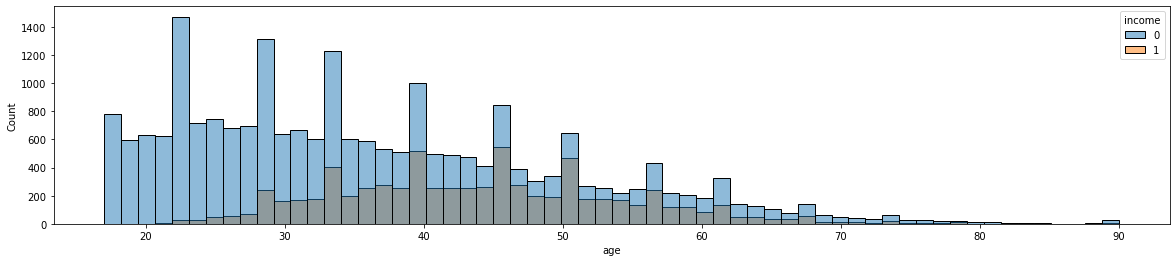

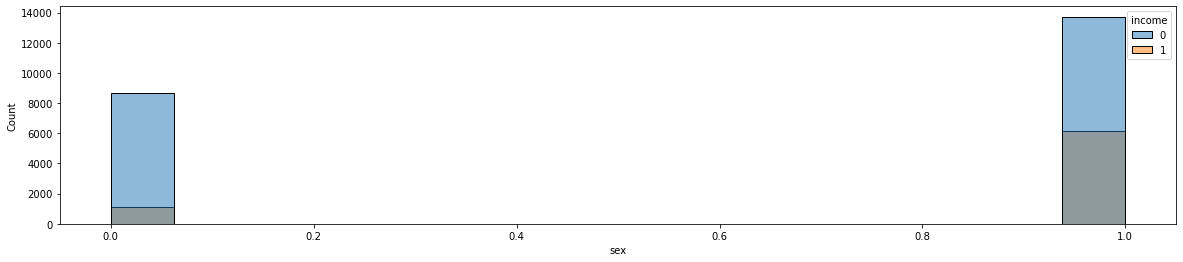

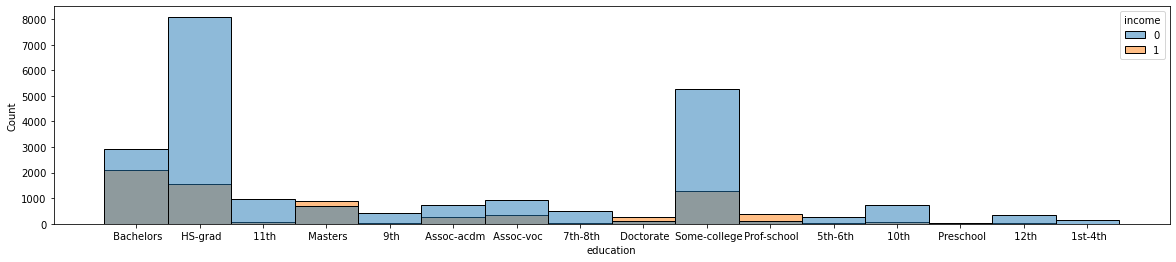

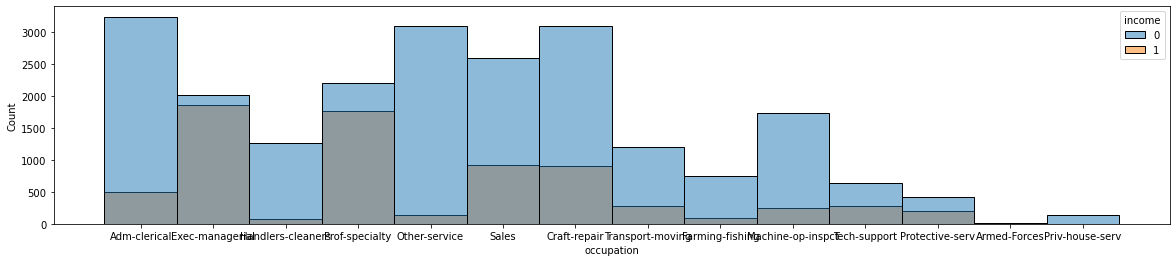

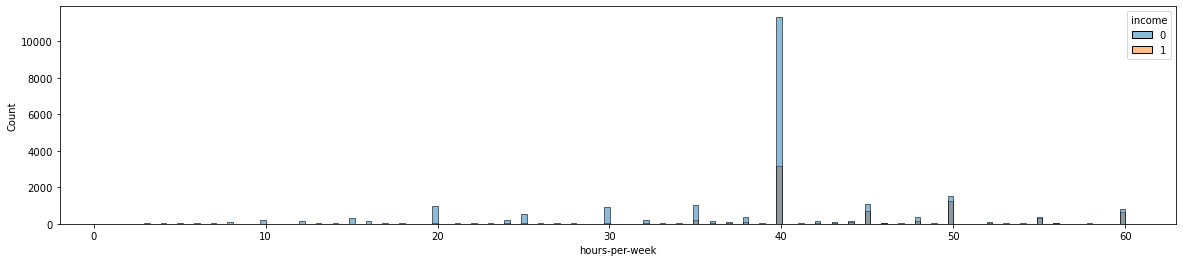

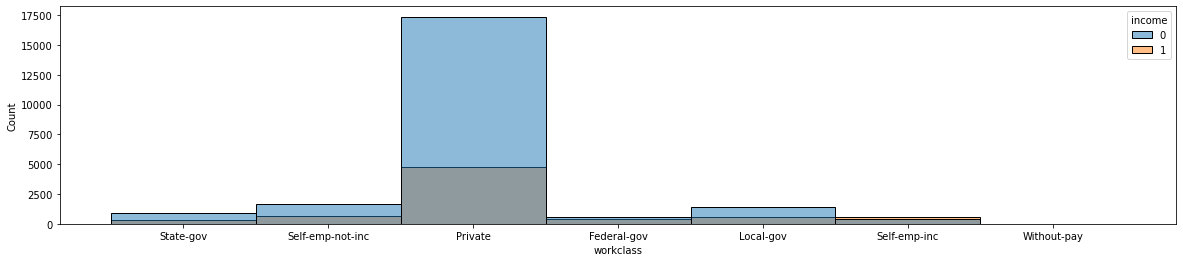

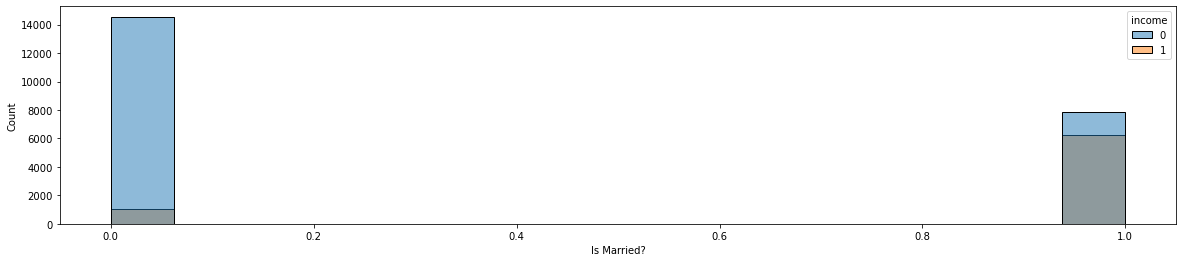

In [41]:
for col in refined_dataset.columns:
    if col != 'income':
        plt.figure(figsize = (20, 4))
        sns.histplot(data=refined_dataset, x=col, hue= 'income')    

## 3. Model Development 

In [42]:
#import packages 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import xgboost
from sklearn import metrics

### 3.1 train, validation, and test splits 

In [43]:
X =  encoded_dataset.drop('income' , axis = 1)
Y = encoded_dataset['income']

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)

xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size= 0.2)

### 3.2 Baseline modeling 

Accuracy: 0.75
AUC: 0.50
F1 score: 0.00
Confusion matrix [[TN, FP], [FN, TP]]: 
[[3121 1029]
 [   0    0]]


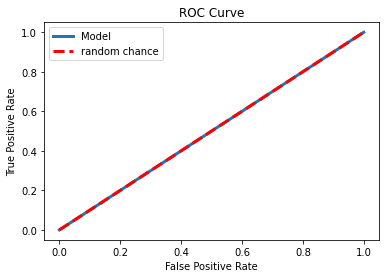

In [45]:
dummy_clf = DummyClassifier(strategy='most_frequent')  #define baseline  model
dummy_clf.fit(xtrain, ytrain) #train


acc = metrics.accuracy_score(dummy_clf.predict(xval), yval)
print(f'Accuracy: { acc:.2f}')

probs = dummy_clf.predict_proba(xval)[:,1]
auc = metrics.roc_auc_score(yval, probs)
print(f'AUC: {auc:.2f}')

f1 = metrics.f1_score(dummy_clf.predict(xval), yval)
print(f'F1 score: {f1:.2f}')

cm = metrics.confusion_matrix(dummy_clf.predict(xval), yval)
print('Confusion matrix [[TN, FP], [FN, TP]]: ', cm, sep = '\n')

fpr, tpr, thresholds  = metrics.roc_curve(yval, probs)

plt.plot(fpr, tpr, label = 'Model', lw = 3);
plt.plot([0,1], [0,1], 'r--', label = 'random chance', lw = 3);
plt.legend();
plt.title('ROC Curve');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');


### 3.3 Model Selection

#### Naive Bayes 

Accuracy: 0.79
AUC: 0.82
F1 score: 0.54
Confusion matrix [[TN, FP], [FN, TP]]: 
[[2794  533]
 [ 327  496]]


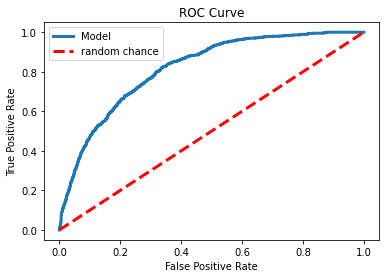

In [46]:
naive =  MultinomialNB()  # define model
naive.fit(xtrain, ytrain) # train model 

acc = metrics.accuracy_score(naive.predict(xval), yval)
print(f'Accuracy: { acc:.2f}')

probs = naive.predict_proba(xval)[:,1]
auc = metrics.roc_auc_score(yval, probs)
print(f'AUC: {auc:.2f}')

f1 = metrics.f1_score(naive.predict(xval), yval)
print(f'F1 score: {f1:.2f}')

cm = metrics.confusion_matrix(naive.predict(xval), yval)
print('Confusion matrix [[TN, FP], [FN, TP]]: ', cm, sep = '\n')

fpr, tpr, thresholds  = metrics.roc_curve(yval, probs)

plt.plot(fpr, tpr, label = 'Model', lw = 3);
plt.plot([0,1], [0,1], 'r--', label = 'random chance', lw = 3);
plt.legend();
plt.title('ROC Curve');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');


#### Logistic Regression 

Accuracy: 0.82
AUC: 0.88
F1 score: 0.60
Confusion matrix [[TN, FP], [FN, TP]]: 
[[2860  481]
 [ 261  548]]


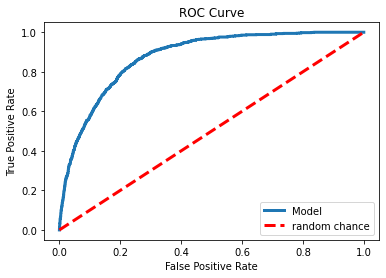

In [47]:
lr =  LogisticRegression()  # define model
lr.fit(xtrain, ytrain) # train model 

acc = metrics.accuracy_score(lr.predict(xval), yval)
print(f'Accuracy: { acc:.2f}')

probs = lr.predict_proba(xval)[:,1]
auc = metrics.roc_auc_score(yval, probs)
print(f'AUC: {auc:.2f}')

f1 = metrics.f1_score(lr.predict(xval), yval)
print(f'F1 score: {f1:.2f}')

cm = metrics.confusion_matrix(lr.predict(xval), yval)
print('Confusion matrix [[TN, FP], [FN, TP]]: ', cm, sep = '\n')

fpr, tpr, thresholds  = metrics.roc_curve(yval, probs)

plt.plot(fpr, tpr, label = 'Model', lw = 3);
plt.plot([0,1], [0,1], 'r--', label = 'random chance', lw = 3);
plt.legend();
plt.title('ROC Curve');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');

#### XGBoost Classifier 

Accuracy: 0.83
AUC: 0.88
F1 score: 0.62
Confusion matrix [[TN, FP], [FN, TP]]: 
[[2843  447]
 [ 278  582]]


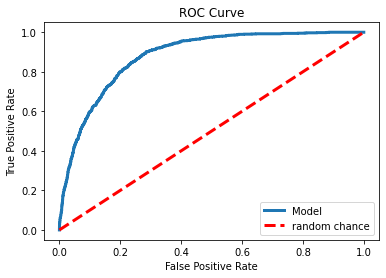

In [48]:
xgb =  xgboost.XGBClassifier()  # define model
xgb.fit(xtrain, ytrain) # train model 

acc = metrics.accuracy_score(xgb.predict(xval), yval)
print(f'Accuracy: { acc:.2f}')

probs = xgb.predict_proba(xval)[:,1]
auc = metrics.roc_auc_score(yval, probs)
print(f'AUC: {auc:.2f}')

f1 = metrics.f1_score(xgb.predict(xval), yval)
print(f'F1 score: {f1:.2f}')

cm = metrics.confusion_matrix(xgb.predict(xval), yval)
print('Confusion matrix [[TN, FP], [FN, TP]]: ', cm, sep = '\n')

fpr, tpr, thresholds  = metrics.roc_curve(yval, probs)

plt.plot(fpr, tpr, label = 'Model', lw = 3);
plt.plot([0,1], [0,1], 'r--', label = 'random chance', lw = 3);
plt.legend();
plt.title('ROC Curve');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');

### 3.4 Model optimization 

Accuracy: 0.83
AUC: 0.89
F1 score: 0.62
Confusion matrix [[TN, FP], [FN, TP]]: 
[[2849  442]
 [ 272  587]]


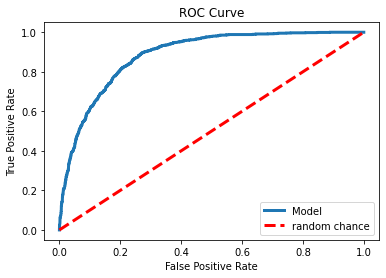

In [49]:
xgb =  xgboost.XGBClassifier(n_estimators = 50)  # define model and do hyperparamters tuning 
xgb.fit(xtrain, ytrain) # train model 

acc = metrics.accuracy_score(xgb.predict(xval), yval)
print(f'Accuracy: { acc:.2f}')

probs = xgb.predict_proba(xval)[:,1]
auc = metrics.roc_auc_score(yval, probs)
print(f'AUC: {auc:.2f}')

f1 = metrics.f1_score(xgb.predict(xval), yval)
print(f'F1 score: {f1:.2f}')

cm = metrics.confusion_matrix(xgb.predict(xval), yval)
print('Confusion matrix [[TN, FP], [FN, TP]]: ', cm, sep = '\n')

fpr, tpr, thresholds  = metrics.roc_curve(yval, probs)

plt.plot(fpr, tpr, label = 'Model', lw = 3);
plt.plot([0,1], [0,1], 'r--', label = 'random chance', lw = 3);
plt.legend();
plt.title('ROC Curve');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');

#### Conlusions for model dev

Select XGBoost classifier for further steps. 

# 4. Model Testing 

Metrics:
* Accuracy
* AUC
* F1 Score
* ROC Curve 

Accuracy: 0.84
AUC: 0.89
F1 score: 0.64
Confusion matrix [[TN, FP], [FN, TP]]: 
[[6208  921]
 [ 507 1257]]


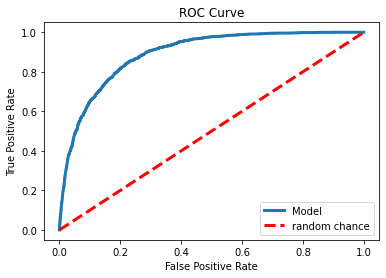

In [50]:
# Use the testing dataset 
acc = metrics.accuracy_score(xgb.predict(xtest), ytest)
print(f'Accuracy: { acc:.2f}')

probs = xgb.predict_proba(xtest)[:,1]
auc = metrics.roc_auc_score(ytest, probs)
print(f'AUC: {auc:.2f}')

f1 = metrics.f1_score(xgb.predict(xtest), ytest)
print(f'F1 score: {f1:.2f}')

cm = metrics.confusion_matrix(xgb.predict(xtest), ytest)
print('Confusion matrix [[TN, FP], [FN, TP]]: ', cm, sep = '\n')

fpr, tpr, thresholds  = metrics.roc_curve(ytest, probs)

plt.plot(fpr, tpr, label = 'Model', lw = 3);
plt.plot([0,1], [0,1], 'r--', label = 'random chance', lw = 3);
plt.legend();
plt.title('ROC Curve');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');

# 5. Model Packaging 

Usually, model is packaged in a container like a docker container. For this lecture, we will save the trained model to a json file and reuse it later. 

In [51]:
import joblib 

In [52]:
joblib.dump(xgb, 'xgb_model.json')

['xgb_model.json']

Accuracy: 0.84
AUC: 0.89
F1 score: 0.64
Confusion matrix [[TN, FP], [FN, TP]]: 
[[6208  921]
 [ 507 1257]]


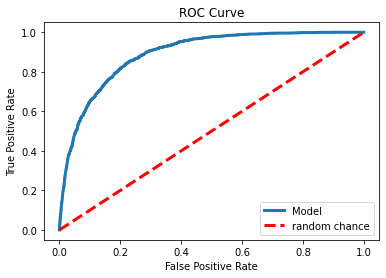

In [53]:
# load and test the model 
xgb_loaded =  joblib.load('xgb_model.json')


acc = metrics.accuracy_score(xgb_loaded.predict(xtest), ytest)
print(f'Accuracy: { acc:.2f}')

probs = xgb_loaded.predict_proba(xtest)[:,1]
auc = metrics.roc_auc_score(ytest, probs)
print(f'AUC: {auc:.2f}')

f1 = metrics.f1_score(xgb_loaded.predict(xtest), ytest)
print(f'F1 score: {f1:.2f}')

cm = metrics.confusion_matrix(xgb_loaded.predict(xtest), ytest)
print('Confusion matrix [[TN, FP], [FN, TP]]: ', cm, sep = '\n')

fpr, tpr, thresholds  = metrics.roc_curve(ytest, probs)

plt.plot(fpr, tpr, label = 'Model', lw = 3);
plt.plot([0,1], [0,1], 'r--', label = 'random chance', lw = 3);
plt.legend();
plt.title('ROC Curve');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');


# 6. Deployment

This model will be deployed as a desktop application (on premise) and will support batch inference.

In [54]:
%run deploy_model.py

   ID  Is > 50K?
0   0          0
1   1          0
2   2          0
3   3          0
4   4          0
   ID  Is > 50K?
0   0          0
1   1          0
2   2          0
3   3          0
4   4          0
   ID  Is > 50K?
0   0          0
1   1          0
2   2          0
3   3          0
4   4          0


<Figure size 432x288 with 0 Axes>

# 7. Monitoring and Maintenance 

* Monitor for data drift
* Monitor for concept drift
* Identify and resolve bugs
* Retrain model if necessary

<h1 align ='center'> Thank you! </h1>